In [94]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [95]:
import numpy as np
import pandas as pd

In [96]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [97]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [98]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [99]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [100]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [101]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [102]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

            prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24  2.15
2016-08-24  1.45


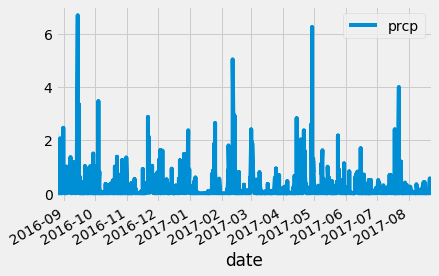

In [103]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prec12 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= "2017-08-23").\
    filter(Measurement.date >= "2016-08-24").all()
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
prec12_df = pd.DataFrame(prec12)
# Sort the dataframe by date
prec12_df['date'] =pd.to_datetime(prec12_df["date"])
prec12srt_df = prec12_df.sort_values(by='date',ascending=True)
prec12srt_df= prec12srt_df.set_index('date')
#drop null values
prec12srt_df= prec12srt_df.dropna()
# Use Pandas Plotting with Matplotlib to plot the data
print(prec12srt_df.head())
prec12srt_df.plot(kind= "line");

![precipitation](Images/precipitation.png)

In [104]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(prec12srt_df.describe())

              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


![describe](Images/describe.png)

In [105]:
# Design a query to show how many stations are available in this dataset?
stat_count = session.query(Station.id).count()
print(stat_count)

9


In [106]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
statqry = session.query(Measurement.station,Station.name)\
    .filter(Measurement.station==Station.station).all()
statqrydf = pd.DataFrame(statqry)
statqrydf.head()
#group by, count and sort stations
statqrydf_group= statqrydf.groupby('station')
statqrydf_grpcnt = statqrydf_group.count()
stat_df = pd.DataFrame(statqrydf_grpcnt).reset_index()
stat_df = stat_df.sort_values(by= 'name', ascending=False)
print(stat_df)

       station  name
6  USC00519281  2772
7  USC00519397  2724
1  USC00513117  2709
8  USC00519523  2669
3  USC00516128  2612
2  USC00514830  2202
0  USC00511918  1979
4  USC00517948  1372
5  USC00518838   511


In [107]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
tempqry = session.query(Measurement.tobs, Station.id)\
    .filter(Measurement.station==Station.station).filter(Station.station=='USC00519281').all()

temp_df =pd.DataFrame(tempqry)
print(temp_df.head())

#min max avg 
mintemp = temp_df['tobs'].min()
maxtemp = temp_df['tobs'].max()
avgtemp = temp_df['tobs'].mean()
print(mintemp, maxtemp, avgtemp)

   tobs  id
0  70.0   7
1  62.0   7
2  74.0   7
3  75.0   7
4  74.0   7
54.0 85.0 71.66378066378067


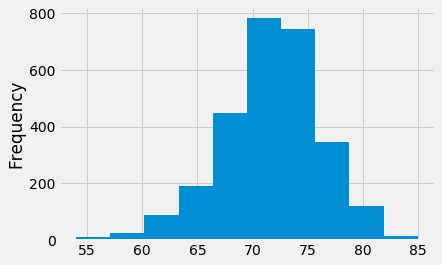

In [108]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df['tobs'].plot(kind= "hist");

![precipitation](Images/station-histogram.png)

In [109]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [110]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_stats=(calc_temps('2016-05-28', '2016-06-03'))
print(trip_stats)

[(64.0, 72.34883720930233, 79.0)]


In [111]:
# Plot the results from your previous query as a bar chart.
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [112]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


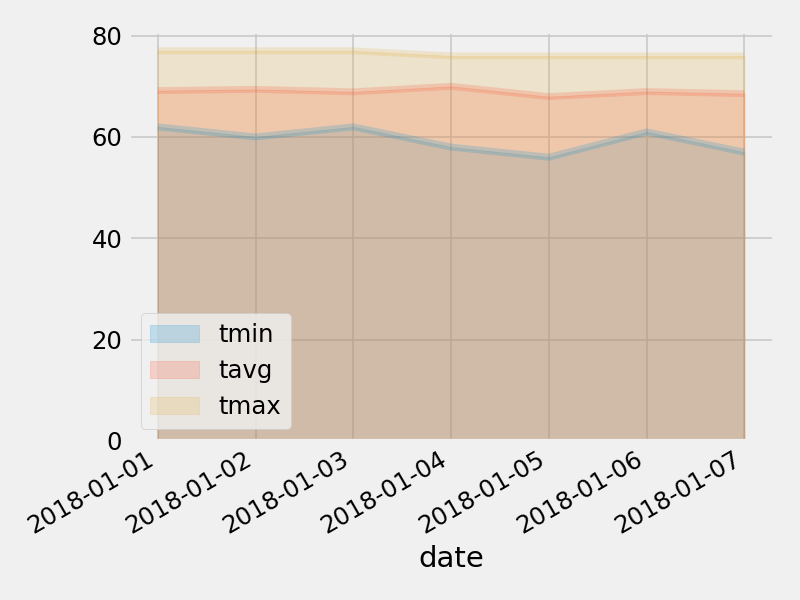

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
